In [2]:
# Módulos externos
import sympy as sp
from sympy.abc import s

# Ahora importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle
import numpy as np
import scipy.signal as sig
from IPython.display import display, Markdown

# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys


In [3]:
# Declaración de Variables

n = 3 #Orden del Filtro
alpha_max = 0.5 #Máxima atenuación en la Banda de paso

# Cálculo de la Transferencia

[z, p, k] = sig.cheb1ap(n, alpha_max) #Obtención de los polos, ceros y ganancia de la transferencia

[num, den] = sig.zpk2tf(z, p, k) #Calculo del numerador y denominador a partir de los polos y ceros

Hlp = TransferFunction(num, den) #Transferencia calculada

Hlp_sos = tf2sos_analog(num, den) #Factorización de la transferencia en secciones de Orden 2

# Ploteo

display(Markdown('### Filtro pasabajos Chebyshev de Orden 3 normalizado' ))

pretty_print_lti(num, den)

display(Markdown('### Filtro pasabajos Chebyshev de Orden 3 normalizado y factorizado en SOS' ))

pretty_print_SOS(Hlp_sos, mode='omegayq')


### Filtro pasabajos Chebyshev de Orden 3 normalizado

<IPython.core.display.Math object>

### Filtro pasabajos Chebyshev de Orden 3 normalizado y factorizado en SOS

<IPython.core.display.Math object>

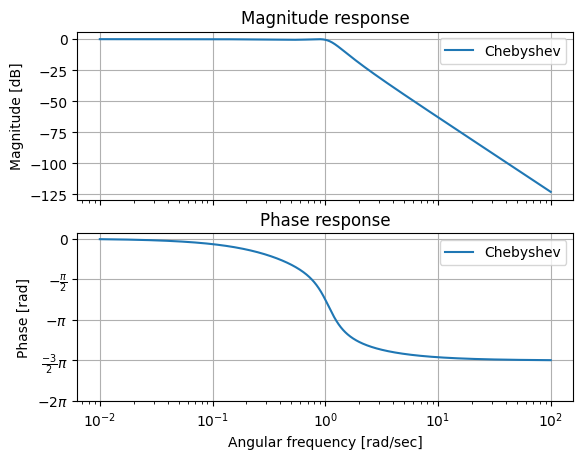

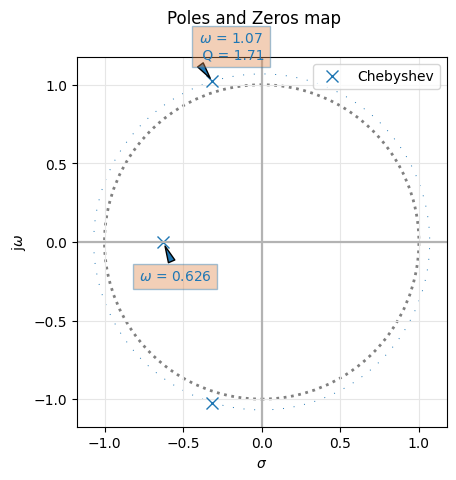

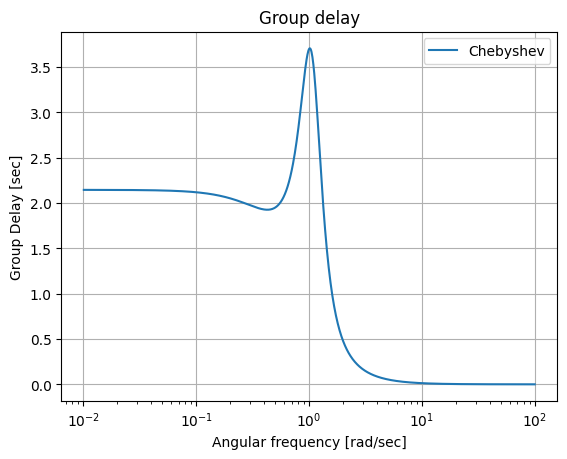

In [4]:
# Simulación Numérica
analyze_sys(Hlp, "Chebyshev")